# CPI VISION


In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

In [84]:
cpi_hist = pd.read_csv('CPI_HistoryMar_23.csv')
cpi_hist

,Month,Category,Value,Percentage Change (From Prior Month)
0,31-03-2023,Headline_CPI,109.0,1.0
1,31-03-2023,Food and non-alcoholic beverages,116.7,1.0
2,31-03-2023,Alcoholic beverages and tobacco,109.2,2.2
3,31-03-2023,Clothing and footwear,103.4,-0.1
4,31-03-2023,Housing and utilities,104.5,0.4
...,...,...,...,...
190,31-01-2022,Communication,99.8,-0.2
191,31-01-2022,Recreation and culture,100.2,0.2
192,31-01-2022,Education,100.0,0.0
193,31-01-2022,Restaurants and hotels,101.2,1.2


In [85]:
cpi_hist.isna().sum()

Month                                   0
Category                                0
Value                                   0
Percentage Change (From Prior Month)    0
dtype: int64

In [86]:
cpi_hist.duplicated().sum()

0

In [87]:
cpi_hist['Category'].unique()

array(['Headline_CPI', 'Food and non-alcoholic beverages',
       'Alcoholic beverages and tobacco', 'Clothing and footwear',
       'Housing and utilities', 'Household contents and services',
       'Health', 'Transport', 'Communication', 'Recreation and culture',
       'Education', 'Restaurants and hotels ',
       'Miscellaneous goods and services'], dtype=object)

In [88]:
cpi_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 4 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Month                                 195 non-null    object 
 1   Category                              195 non-null    object 
 2   Value                                 195 non-null    float64
 3   Percentage Change (From Prior Month)  195 non-null    float64
dtypes: float64(2), object(2)
memory usage: 6.2+ KB


In [89]:
cpi_hist['Month'] = pd.to_datetime(cpi_hist['Month'])

/var/folders/78/_y27g9w55d15tg1plv7v95540000gq/T/ipykernel_2762/3176923084.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  cpi_hist['Month'] = pd.to_datetime(cpi_hist['Month'])


In [90]:
cpi_pivot = cpi_hist.pivot(index = 'Month', columns = 'Category', values = 'Value').reset_index()#changing from a long format to a wide format,
cpi_pivot = cpi_pivot.sort_values("Month").reset_index(drop=True)
cpi_pivot


Category,Month,Alcoholic beverages and tobacco,Clothing and footwear,Communication,Education,Food and non-alcoholic beverages,Headline_CPI,Health,Household contents and services,Housing and utilities,Miscellaneous goods and services,Recreation and culture,Restaurants and hotels,Transport
0,2022-01-31,100.0,100.2,99.8,100.0,100.9,100.2,100.1,100.4,100.0,100.6,100.2,101.2,98.9
1,2022-02-28,100.6,100.3,99.7,100.0,101.8,100.8,103.2,100.4,100.1,101.5,100.3,101.9,100.6
2,2022-03-31,102.8,100.5,99.7,104.4,102.4,101.8,103.7,100.8,100.5,101.9,100.4,103.0,103.7
3,2022-04-30,103.6,100.7,99.6,104.4,103.1,102.4,104.0,101.1,100.5,102.8,100.7,103.3,105.1
4,2022-05-31,104.4,100.9,99.9,104.4,105.3,103.1,104.3,101.8,100.6,102.9,101.0,103.8,105.9
5,2022-06-30,104.5,101.3,100.3,104.4,106.6,104.2,104.6,103.0,101.2,103.0,101.2,104.2,110.3
6,2022-07-31,104.4,101.6,99.4,104.4,107.8,105.8,104.1,103.3,103.1,103.4,102.3,104.6,115.6
7,2022-08-31,104.7,102.1,100.1,104.4,109.7,106.0,104.2,103.7,103.2,103.5,102.4,104.3,114.5
8,2022-09-30,105.6,102.5,99.9,104.4,110.3,106.1,104.0,104.5,103.7,103.8,102.5,106.2,112.0
9,2022-10-31,106.1,102.6,99.8,104.4,111.3,106.5,104.5,105.0,103.8,104.7,102.7,107.4,111.7


In [91]:
cpi_pivot['Month'] = pd.to_datetime(cpi_pivot['Month'], format='%B %Y-%d')
cpi_pivot

Category,Month,Alcoholic beverages and tobacco,Clothing and footwear,Communication,Education,Food and non-alcoholic beverages,Headline_CPI,Health,Household contents and services,Housing and utilities,Miscellaneous goods and services,Recreation and culture,Restaurants and hotels,Transport
0,2022-01-31,100.0,100.2,99.8,100.0,100.9,100.2,100.1,100.4,100.0,100.6,100.2,101.2,98.9
1,2022-02-28,100.6,100.3,99.7,100.0,101.8,100.8,103.2,100.4,100.1,101.5,100.3,101.9,100.6
2,2022-03-31,102.8,100.5,99.7,104.4,102.4,101.8,103.7,100.8,100.5,101.9,100.4,103.0,103.7
3,2022-04-30,103.6,100.7,99.6,104.4,103.1,102.4,104.0,101.1,100.5,102.8,100.7,103.3,105.1
4,2022-05-31,104.4,100.9,99.9,104.4,105.3,103.1,104.3,101.8,100.6,102.9,101.0,103.8,105.9
5,2022-06-30,104.5,101.3,100.3,104.4,106.6,104.2,104.6,103.0,101.2,103.0,101.2,104.2,110.3
6,2022-07-31,104.4,101.6,99.4,104.4,107.8,105.8,104.1,103.3,103.1,103.4,102.3,104.6,115.6
7,2022-08-31,104.7,102.1,100.1,104.4,109.7,106.0,104.2,103.7,103.2,103.5,102.4,104.3,114.5
8,2022-09-30,105.6,102.5,99.9,104.4,110.3,106.1,104.0,104.5,103.7,103.8,102.5,106.2,112.0
9,2022-10-31,106.1,102.6,99.8,104.4,111.3,106.5,104.5,105.0,103.8,104.7,102.7,107.4,111.7


Visaualzing CPI categories

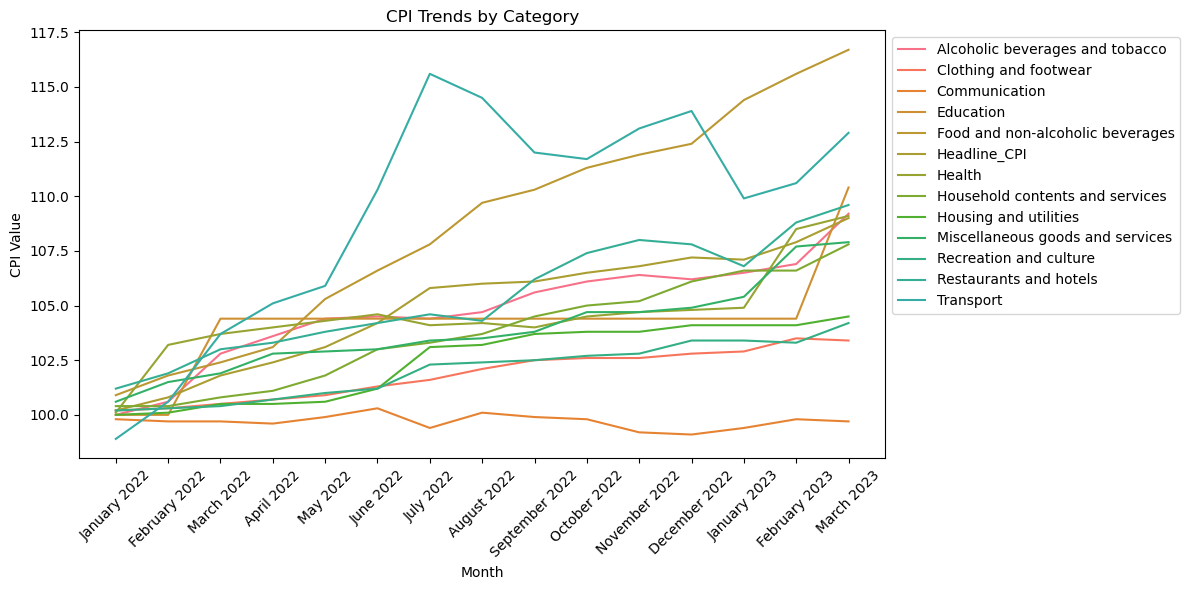

In [92]:


# Set the figure size
plt.figure(figsize=(12, 6))

# Format the 'Month' column to include month names
cpi_pivot['Month'] = cpi_pivot['Month'].apply(lambda x: pd.to_datetime(x).strftime('%B %Y'))

# Set a larger Seaborn color palette with 12 distinct colors
colors = sns.color_palette('husl', 12 * 2)

# Plot CPI trends for each category
for i, column in enumerate(cpi_pivot.columns[1:]):
    plt.plot(cpi_pivot['Month'], cpi_pivot[column], label=column, color=colors[i])

# Customize the plot
plt.xlabel('Month')
plt.ylabel('CPI Value')
plt.title('CPI Trends by Category')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


In [93]:
date_str = '2023-04-30'
date_obj = pd.to_datetime(date_str)
new_row = pd.DataFrame({'Month': [date_obj]})
cpi_pivot = pd.concat([cpi_pivot, new_row]).reset_index(drop=True)
cpi_pivot

,Month,Alcoholic beverages and tobacco,Clothing and footwear,Communication,Education,Food and non-alcoholic beverages,Headline_CPI,Health,Household contents and services,Housing and utilities,Miscellaneous goods and services,Recreation and culture,Restaurants and hotels,Transport
0,January 2022,100.0,100.2,99.8,100.0,100.9,100.2,100.1,100.4,100.0,100.6,100.2,101.2,98.9
1,February 2022,100.6,100.3,99.7,100.0,101.8,100.8,103.2,100.4,100.1,101.5,100.3,101.9,100.6
2,March 2022,102.8,100.5,99.7,104.4,102.4,101.8,103.7,100.8,100.5,101.9,100.4,103.0,103.7
3,April 2022,103.6,100.7,99.6,104.4,103.1,102.4,104.0,101.1,100.5,102.8,100.7,103.3,105.1
4,May 2022,104.4,100.9,99.9,104.4,105.3,103.1,104.3,101.8,100.6,102.9,101.0,103.8,105.9
5,June 2022,104.5,101.3,100.3,104.4,106.6,104.2,104.6,103.0,101.2,103.0,101.2,104.2,110.3
6,July 2022,104.4,101.6,99.4,104.4,107.8,105.8,104.1,103.3,103.1,103.4,102.3,104.6,115.6
7,August 2022,104.7,102.1,100.1,104.4,109.7,106.0,104.2,103.7,103.2,103.5,102.4,104.3,114.5
8,September 2022,105.6,102.5,99.9,104.4,110.3,106.1,104.0,104.5,103.7,103.8,102.5,106.2,112.0
9,October 2022,106.1,102.6,99.8,104.4,111.3,106.5,104.5,105.0,103.8,104.7,102.7,107.4,111.7


#### Converting the 'Month' column back to appropriate datatype and extracting year and month from the 'Month' column

In [101]:
cpi_pivot['year_month'] = pd.to_datetime(cpi_pivot['Month'], format='%Y-%b').dt.strftime('%Y-%m')

cpi_pivot['Month']= pd.to_datetime(cpi_pivot['Month'])
cpi_pivot

,Month,Alcoholic beverages and tobacco,Clothing and footwear,Communication,Education,Food and non-alcoholic beverages,Headline_CPI,Health,Household contents and services,Housing and utilities,Miscellaneous goods and services,Recreation and culture,Restaurants and hotels,Transport,year_month
0,2022-01-01,100.0,100.2,99.8,100.0,100.9,100.2,100.1,100.4,100.0,100.6,100.2,101.2,98.9,2022-01
1,2022-02-01,100.6,100.3,99.7,100.0,101.8,100.8,103.2,100.4,100.1,101.5,100.3,101.9,100.6,2022-02
2,2022-03-01,102.8,100.5,99.7,104.4,102.4,101.8,103.7,100.8,100.5,101.9,100.4,103.0,103.7,2022-03
3,2022-04-01,103.6,100.7,99.6,104.4,103.1,102.4,104.0,101.1,100.5,102.8,100.7,103.3,105.1,2022-04
4,2022-05-01,104.4,100.9,99.9,104.4,105.3,103.1,104.3,101.8,100.6,102.9,101.0,103.8,105.9,2022-05
5,2022-06-01,104.5,101.3,100.3,104.4,106.6,104.2,104.6,103.0,101.2,103.0,101.2,104.2,110.3,2022-06
6,2022-07-01,104.4,101.6,99.4,104.4,107.8,105.8,104.1,103.3,103.1,103.4,102.3,104.6,115.6,2022-07
7,2022-08-01,104.7,102.1,100.1,104.4,109.7,106.0,104.2,103.7,103.2,103.5,102.4,104.3,114.5,2022-08
8,2022-09-01,105.6,102.5,99.9,104.4,110.3,106.1,104.0,104.5,103.7,103.8,102.5,106.2,112.0,2022-09
9,2022-10-01,106.1,102.6,99.8,104.4,111.3,106.5,104.5,105.0,103.8,104.7,102.7,107.4,111.7,2022-10


In [95]:
cpi_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Month                             16 non-null     datetime64[ns]
 1   Alcoholic beverages and tobacco   15 non-null     float64       
 2   Clothing and footwear             15 non-null     float64       
 3   Communication                     15 non-null     float64       
 4   Education                         15 non-null     float64       
 5   Food and non-alcoholic beverages  15 non-null     float64       
 6   Headline_CPI                      15 non-null     float64       
 7   Health                            15 non-null     float64       
 8   Household contents and services   15 non-null     float64       
 9   Housing and utilities             15 non-null     float64       
 10  Miscellaneous goods and services  15 non-null     fl

## Cleaning Vehicle Sales dataset

In [96]:
vehicles = pd.read_csv('Naamsa_Vehicle_Sales.csv')
vehicles

,Month,Local_Passenger_Vehicles,Export_Sales_Passenger_Vehicles,Local_Light_Commercial_Vehicles,Export_Sales_Light_Commercial_Vehicles,Local_Medium_Commercial_Vehicles,Export_Sales_Medium_Commercial_Vehicles,Local_Heavy_Commercial_Vehicles,Export_Sales_Heavy_Commercial_Vehicles,Local_Extra_Heavy_Commercial_Vehicles,Export_Sales_Extra_Heavy_Commercial_Vehicles,Local_Bus_Sales,Export_Sales_Buses,Total_Local Sales,Total_Export_Sales
0,23-Mar,31631,23481,15529,10578,870,18,491,32,1593,25,43,0,50157,34134
1,23-Feb,29976,20079,12972,10244,697,33,435,8,1244,40,28,5,45352,30409
2,23-Jan,31072,11227,10622,9243,461,5,331,28,976,29,47,4,43509,20536
3,22-Dec,28793,16844,10438,9406,865,15,417,11,1198,26,72,0,41783,26302
4,22-Nov,32859,23522,13477,10710,900,32,546,13,1551,33,80,0,49413,34310
5,22-Oct,30597,18023,12738,11373,769,43,523,35,1285,32,54,2,45966,29508
6,22-Sep,32392,23680,12573,17691,882,17,490,56,1367,27,82,3,47786,41474
7,22-Aug,31269,17622,13281,10981,715,10,558,25,1516,21,81,3,47420,28662
8,22-Jul,31455,23479,9547,7670,790,21,471,50,1281,18,49,4,43593,31242
9,22-Jun,29545,23745,8877,9194,697,57,560,33,1263,10,77,15,41019,33054


#### We can see that the "Month" column doesn't have the year. However, we already know that we are working with dates from March 2023 going backward. We will convert this column to its appropriate data type and extract the month and year from it. The end goal is to be able to merge the previous dataset with this one.

In [97]:
start_date = datetime.datetime.strptime("2020-12-31", "%Y-%m-%d")
end_date = datetime.datetime.strptime("2023-03-31", "%Y-%m-%d")

# difference between each date. M means one month end
D = 'M'

date_list = pd.date_range(start_date, end_date, freq=D)[::-1]
vehicles['Month'] = date_list
vehicles['Month'] = pd.to_datetime(vehicles['Month'], format='%Y-%b-%d')
vehicles['year_month'] = pd.to_datetime(vehicles['Month'], format='%Y-%b').dt.strftime('%Y-%m')
vehicles

,Month,Local_Passenger_Vehicles,Export_Sales_Passenger_Vehicles,Local_Light_Commercial_Vehicles,Export_Sales_Light_Commercial_Vehicles,Local_Medium_Commercial_Vehicles,Export_Sales_Medium_Commercial_Vehicles,Local_Heavy_Commercial_Vehicles,Export_Sales_Heavy_Commercial_Vehicles,Local_Extra_Heavy_Commercial_Vehicles,Export_Sales_Extra_Heavy_Commercial_Vehicles,Local_Bus_Sales,Export_Sales_Buses,Total_Local Sales,Total_Export_Sales,year_month
0,2023-03-31,31631,23481,15529,10578,870,18,491,32,1593,25,43,0,50157,34134,2023-03
1,2023-02-28,29976,20079,12972,10244,697,33,435,8,1244,40,28,5,45352,30409,2023-02
2,2023-01-31,31072,11227,10622,9243,461,5,331,28,976,29,47,4,43509,20536,2023-01
3,2022-12-31,28793,16844,10438,9406,865,15,417,11,1198,26,72,0,41783,26302,2022-12
4,2022-11-30,32859,23522,13477,10710,900,32,546,13,1551,33,80,0,49413,34310,2022-11
5,2022-10-31,30597,18023,12738,11373,769,43,523,35,1285,32,54,2,45966,29508,2022-10
6,2022-09-30,32392,23680,12573,17691,882,17,490,56,1367,27,82,3,47786,41474,2022-09
7,2022-08-31,31269,17622,13281,10981,715,10,558,25,1516,21,81,3,47420,28662,2022-08
8,2022-07-31,31455,23479,9547,7670,790,21,471,50,1281,18,49,4,43593,31242,2022-07
9,2022-06-30,29545,23745,8877,9194,697,57,560,33,1263,10,77,15,41019,33054,2022-06


In [98]:

columns_to_drop = [
    'Local_Passenger_Vehicles', 'Export_Sales_Passenger_Vehicles',
    'Local_Light_Commercial_Vehicles', 'Export_Sales_Light_Commercial_Vehicles',
    'Local_Medium_Commercial_Vehicles', 'Export_Sales_Medium_Commercial_Vehicles',
    'Local_Heavy_Commercial_Vehicles', 'Export_Sales_Heavy_Commercial_Vehicles',
    'Local_Extra_Heavy_Commercial_Vehicles', 'Export_Sales_Extra_Heavy_Commercial_Vehicles',
    'Local_Bus_Sales', 'Export_Sales_Buses'
]


vehicles = vehicles.drop(columns=columns_to_drop)
vehicles

,Month,Total_Local Sales,Total_Export_Sales,year_month
0,2023-03-31,50157,34134,2023-03
1,2023-02-28,45352,30409,2023-02
2,2023-01-31,43509,20536,2023-01
3,2022-12-31,41783,26302,2022-12
4,2022-11-30,49413,34310,2022-11
5,2022-10-31,45966,29508,2022-10
6,2022-09-30,47786,41474,2022-09
7,2022-08-31,47420,28662,2022-08
8,2022-07-31,43593,31242,2022-07
9,2022-06-30,41019,33054,2022-06


In [99]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Month               28 non-null     datetime64[ns]
 1   Total_Local Sales   28 non-null     int64         
 2   Total_Export_Sales  28 non-null     int64         
 3   year_month          28 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 1.0+ KB


#### Merging the datasets

In [102]:
cpi_vehicles = cpi_pivot.merge(vehicles[['year_month', 'Total_Local Sales', 'Total_Export_Sales']], on='year_month', how='left')

cpi_vehicles

,Month,Alcoholic beverages and tobacco,Clothing and footwear,Communication,Education,Food and non-alcoholic beverages,Headline_CPI,Health,Household contents and services,Housing and utilities,Miscellaneous goods and services,Recreation and culture,Restaurants and hotels,Transport,year_month,Total_Local Sales,Total_Export_Sales
0,2022-01-01,100.0,100.2,99.8,100.0,100.9,100.2,100.1,100.4,100.0,100.6,100.2,101.2,98.9,2022-01,41382.0,19089.0
1,2022-02-01,100.6,100.3,99.7,100.0,101.8,100.8,103.2,100.4,100.1,101.5,100.3,101.9,100.6,2022-02,44229.0,32867.0
2,2022-03-01,102.8,100.5,99.7,104.4,102.4,101.8,103.7,100.8,100.5,101.9,100.4,103.0,103.7,2022-03,50607.0,34285.0
3,2022-04-01,103.6,100.7,99.6,104.4,103.1,102.4,104.0,101.1,100.5,102.8,100.7,103.3,105.1,2022-04,37107.0,30788.0
4,2022-05-01,104.4,100.9,99.9,104.4,105.3,103.1,104.3,101.8,100.6,102.9,101.0,103.8,105.9,2022-05,39177.0,25786.0
5,2022-06-01,104.5,101.3,100.3,104.4,106.6,104.2,104.6,103.0,101.2,103.0,101.2,104.2,110.3,2022-06,41019.0,33054.0
6,2022-07-01,104.4,101.6,99.4,104.4,107.8,105.8,104.1,103.3,103.1,103.4,102.3,104.6,115.6,2022-07,43593.0,31242.0
7,2022-08-01,104.7,102.1,100.1,104.4,109.7,106.0,104.2,103.7,103.2,103.5,102.4,104.3,114.5,2022-08,47420.0,28662.0
8,2022-09-01,105.6,102.5,99.9,104.4,110.3,106.1,104.0,104.5,103.7,103.8,102.5,106.2,112.0,2022-09,47786.0,41474.0
9,2022-10-01,106.1,102.6,99.8,104.4,111.3,106.5,104.5,105.0,103.8,104.7,102.7,107.4,111.7,2022-10,45966.0,29508.0


In [103]:
currency_df = pd.read_csv('currency_data.csv')
currency_df

,Date,USD/ZAR,GBP/ZAR,EUR/ZAR
0,2018-01-01,12.310454,16.640806,14.778700
1,2018-01-02,12.390942,16.744291,14.884000
2,2018-01-03,12.434303,16.906560,14.999500
3,2018-01-04,12.360366,16.702070,14.844800
4,2018-01-05,12.292153,16.663372,14.835400
...,...,...,...,...
1901,2023-03-17,18.452360,22.452800,19.830344
1902,2023-03-18,18.762760,22.868297,20.230936
1903,2023-03-19,18.308849,22.283729,19.530859
1904,2023-03-20,18.500143,22.724316,19.839696


In [104]:
currency_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1906 entries, 0 to 1905
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     1906 non-null   object 
 1   USD/ZAR  1906 non-null   float64
 2   GBP/ZAR  1906 non-null   float64
 3   EUR/ZAR  1906 non-null   float64
dtypes: float64(3), object(1)
memory usage: 59.7+ KB


In [110]:
currency_df['Date'] = pd.to_datetime(currency_df['Date'])
currency_df['year_month'] = pd.to_datetime(currency_df['Date'], format='%Y-%b').dt.strftime('%Y-%m')

df_merged  = cpi_vehicles.merge(currency_df, on='year_month', how='left')

df_merged

,Month,Alcoholic beverages and tobacco,Clothing and footwear,Communication,Education,Food and non-alcoholic beverages,Headline_CPI,Health,Household contents and services,Housing and utilities,...,Recreation and culture,Restaurants and hotels,Transport,year_month,Total_Local Sales,Total_Export_Sales,Date,USD/ZAR,GBP/ZAR,EUR/ZAR
0,2022-01-01,100.0,100.2,99.8,100.0,100.9,100.2,100.1,100.4,100.0,...,100.2,101.2,98.9,2022-01,41382.0,19089.0,2022-01-01,15.948554,21.553684,18.130248
1,2022-01-01,100.0,100.2,99.8,100.0,100.9,100.2,100.1,100.4,100.0,...,100.2,101.2,98.9,2022-01,41382.0,19089.0,2022-01-02,15.954915,21.590497,18.157782
2,2022-01-01,100.0,100.2,99.8,100.0,100.9,100.2,100.1,100.4,100.0,...,100.2,101.2,98.9,2022-01,41382.0,19089.0,2022-01-03,15.871300,21.400279,17.924986
3,2022-01-01,100.0,100.2,99.8,100.0,100.9,100.2,100.1,100.4,100.0,...,100.2,101.2,98.9,2022-01,41382.0,19089.0,2022-01-04,16.009941,21.653930,18.063262
4,2022-01-01,100.0,100.2,99.8,100.0,100.9,100.2,100.1,100.4,100.0,...,100.2,101.2,98.9,2022-01,41382.0,19089.0,2022-01-05,15.874581,21.504565,17.950582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,2023-03-01,109.2,103.4,99.7,110.4,116.7,109.0,109.1,107.8,104.5,...,104.2,109.6,112.9,2023-03,50157.0,34134.0,2023-03-18,18.762760,22.868297,20.230936
442,2023-03-01,109.2,103.4,99.7,110.4,116.7,109.0,109.1,107.8,104.5,...,104.2,109.6,112.9,2023-03,50157.0,34134.0,2023-03-19,18.308849,22.283729,19.530859
443,2023-03-01,109.2,103.4,99.7,110.4,116.7,109.0,109.1,107.8,104.5,...,104.2,109.6,112.9,2023-03,50157.0,34134.0,2023-03-20,18.500143,22.724316,19.839696
444,2023-03-01,109.2,103.4,99.7,110.4,116.7,109.0,109.1,107.8,104.5,...,104.2,109.6,112.9,2023-03,50157.0,34134.0,2023-03-21,18.509467,22.718838,19.836685
